# Principal
Principal Components Analysis (PCA) example

Example of using TPrincipal as a stand alone class.

I create n-dimensional data points, where c = trunc(n / 5) + 1
are  correlated with the rest n - c randomly distributed variables.

Based on principal.C by Rene Brun and Christian Holm Christensen




**Author:**  Juan Fernando Jaramillo Botero  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:12 AM.</small></i>

In [1]:
from ROOT import TPrincipal, gRandom, TBrowser, vector


n = 10
m = 10000

c = int(n / 5) + 1

print ("""*************************************************
*         Principal Component Analysis          *
*                                               *
*  Number of variables:           {0:4d}          *
*  Number of data points:         {1:8d}      *
*  Number of dependent variables: {2:4d}          *
*                                               *
*************************************************""".format(n, m, c))

Welcome to JupyROOT 6.18/03
*************************************************
*         Principal Component Analysis          *
*                                               *
*  Number of variables:             10          *
*  Number of data points:            10000      *
*  Number of dependent variables:    3          *
*                                               *
*************************************************


Initilase the TPrincipal object. Use the empty string for the
final argument, if you don't wan't the covariance
matrix. Normalising the covariance matrix is a good idea if your
variables have different orders of magnitude.

In [2]:
principal = TPrincipal(n, "ND")

Use a pseudo-random number generator

In [3]:
randumNum = gRandom

Make the m data-points
Make a variable to hold our data
Allocate memory for the data point

In [4]:
data = vector('double')()
for i in range(m):
    # First we create the un-correlated, random variables, according
    # to one of three distributions
    for j in range(n - c):
        if j % 3 == 0:
            data.push_back(randumNum.Gaus(5, 1))
        elif j % 3 == 1:
            data.push_back(randumNum.Poisson(8))
        else:
            data.push_back(randumNum.Exp(2))

    # Then we create the correlated variables
    for j in range(c):
        data.push_back(0)
        for k in range(n - c - j):
            data[n - c + j] += data[k]

    # Finally we're ready to add this datapoint to the PCA
    principal.AddRow(data.data())
    data.clear()

Do the actual analysis

In [5]:
principal.MakePrincipals()

Print out the result on

In [6]:
principal.Print()

 Variable #  | Mean Value |   Sigma    | Eigenvalue
-------------+------------+------------+------------
           0 |      4.994 |     0.9926 |     0.3856 
           1 |      8.011 |      2.824 |      0.112 
           2 |      2.017 |      1.992 |     0.1031 
           3 |      4.998 |     0.9952 |     0.1022 
           4 |      8.019 |      2.794 |    0.09998 
           5 |      1.976 |      2.009 |     0.0992 
           6 |      4.996 |     0.9996 |    0.09794 
           7 |      35.01 |      5.147 |  1.391e-16 
           8 |      30.01 |      5.041 |  2.707e-16 
           9 |      28.04 |      4.644 |  5.388e-16 



Test the PCA

In [7]:
principal.Test()

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Make some histograms of the orginal, principal, residue, etc data

In [8]:
principal.MakeHistograms()

Make two functions to map between feature and pattern space
Start a browser, so that we may browse the histograms generated
above

In [9]:
principal.MakeCode()
b = TBrowser("principalBrowser", principal)

Writing on file "pca.C" ... done


Draw all canvases 

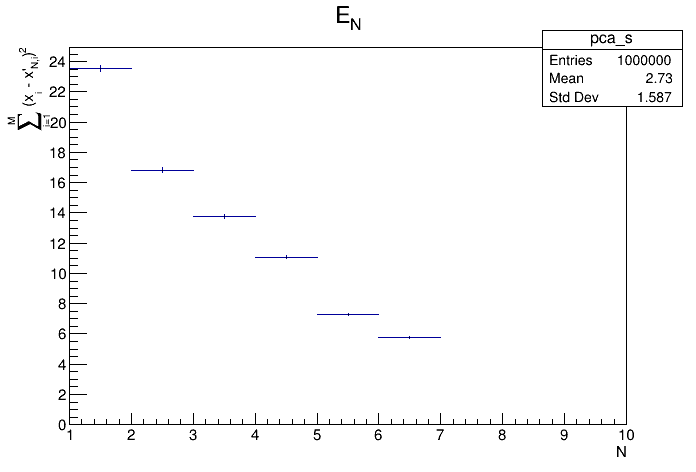

In [10]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()